# Table of Contents
 <p><div class="lev2 toc-item"><a href="#Boxcox-Transformation" data-toc-modified-id="Boxcox-Transformation-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Boxcox Transformation</a></div>

In [1]:
from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
themes = get_themes()
set_nb_theme(themes[1])

In [2]:
# 1. magic for inline plot
# 2. magic to print version
# 3. magic so that the notebook will reload external python modules
# 4. a ipython magic to enable retina (high resolution) plots
# https://gist.github.com/minrk/3301035
%matplotlib inline
%load_ext watermark
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import boxcox

%watermark -a 'Ethen' -d -t -v -p scipy,numpy,matplotlib,statsmodels

Ethen 2017-10-14 09:56:00 

CPython 3.5.2
IPython 6.2.1

scipy 0.19.1
numpy 1.13.3
matplotlib 2.1.0
statsmodels 0.8.0


/Users/ethen/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


http://scikit-learn.org/stable/modules/pipeline.html

In [3]:
filepath = 'international-airline-passengers.csv'
df = (pd.
      read_csv(filepath, header = 0, names = ['Date', 'Passengers']).
      dropna(axis = 0, how = 'any'))
df.head()

,Date,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


## Boxcox Transformation

The square root transform and log transform we've seen so far both belongs to a class of transforms called power transforms and the **Box-Cox transformation** is a family of power transform functions. What's more, it can configured to evaluate a suite of transformation and automatically select a best fit to stabilize variance and make a dataset look more normally distributed.

The `scipy.stats` library provides an implementation of the Box-Cox transform. The `boxcox()` function takes an argument, called `lambda`, that controls the type of transform to perform.

Below are some common values for lambda and its associated transformation:

- lambda = -1. is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform.
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.

For example, we can perform a log transform using the boxcox() function as follows:

A data frame with 47 observations on the following 2 variables:

- `log.Te` Logarithm of the effective temperature at the surface of the star
- `log.light` Logarithm of its light intencity

In [4]:
starsCYG = sm.datasets.get_rdataset(
    dataname = "starsCYG", package = "robustbase", cache = True)
data = starsCYG.data
data.head()

,log.Te,log.light
0,4.37,5.23
1,4.56,5.74
2,4.26,4.93
3,4.56,5.74
4,4.30,5.19


We will plot the histogram of the variable's value side by side with Q-Q plots to show that the Box-Cox transformation does indeed make the data appear to be more normal.

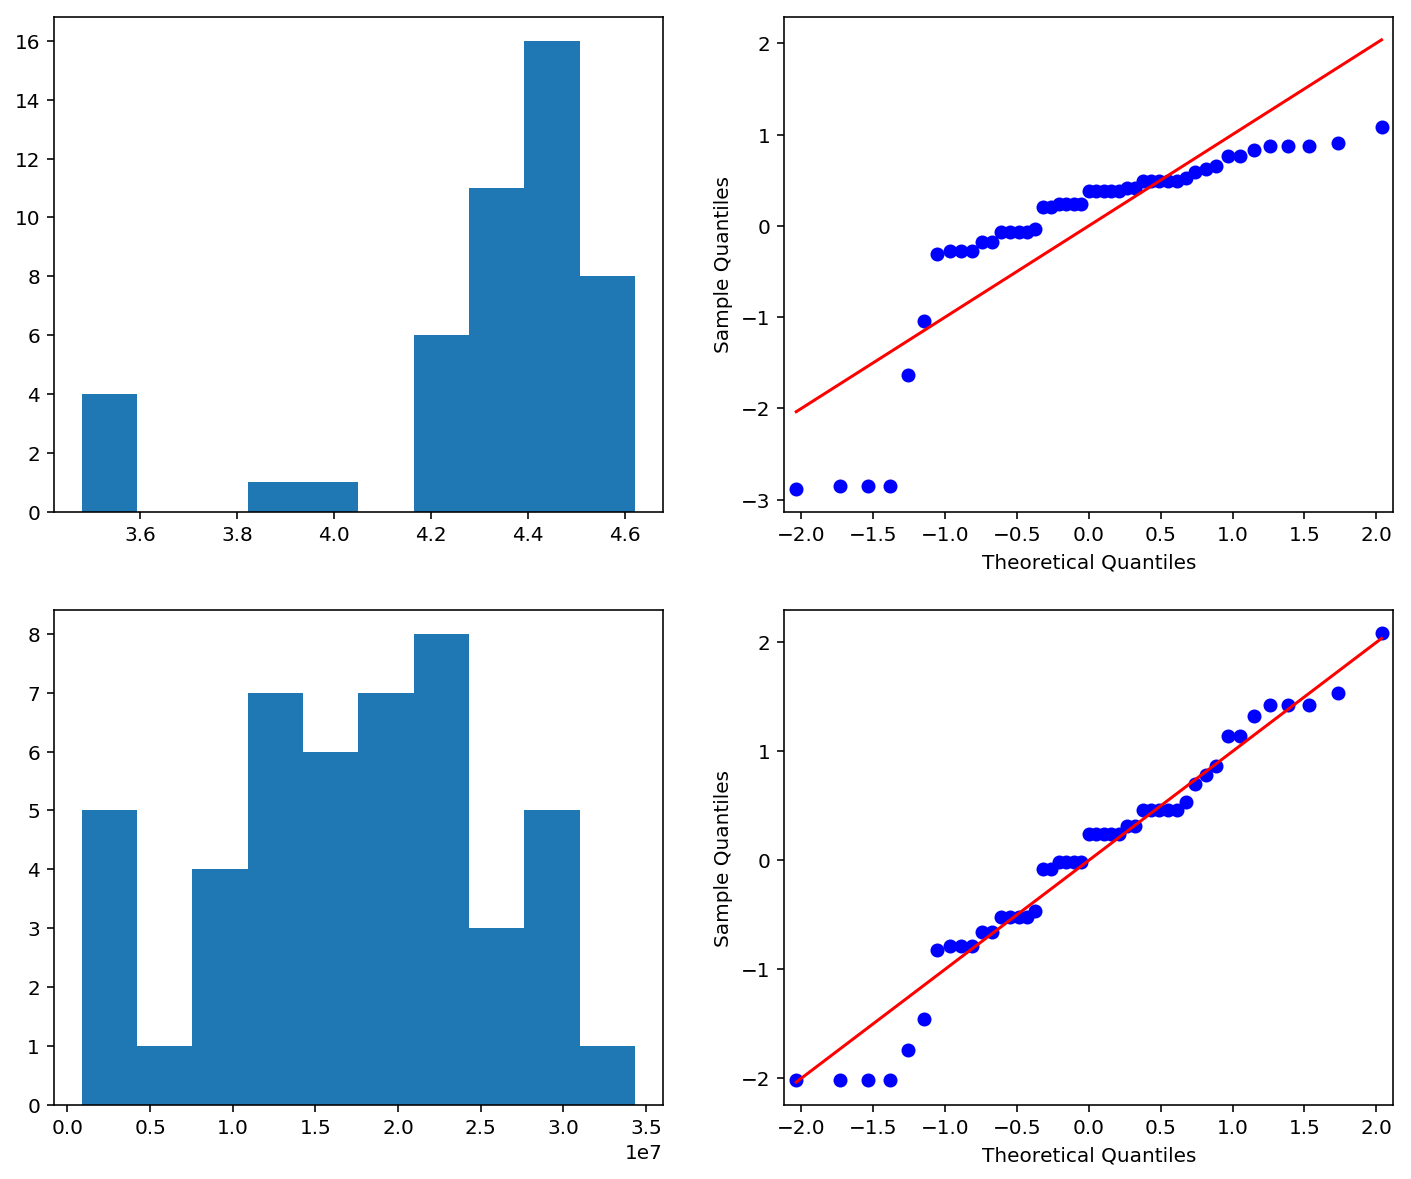

In [15]:
target_col = 'log.Te'
x = data[target_col].values
x_boxcoxed, _ = boxcox(data[target_col])

fig, ax = plt.subplots(2, 2, figsize= (12, 10))
ax[0, 0].hist(x)
sm.qqplot(x, fit = True, line = 's', ax = ax[0, 1])
ax[1, 0].hist(x_boxcoxed)
sm.qqplot(x_boxcoxed, fit = True, line = 's', ax = ax[1, 1])
plt.show()